In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
%matplotlib inline
pd.options.display.max_columns = None
#sns.set_style(style='whitegrid')
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
df = pd.read_csv('base/SINE/D_ETL_IMO_EXTRACAO_SINE_ABERTO_TRABALHADORES_RJ.csv', sep=';', encoding='ISO 8859-1')

In [5]:
df.head()

,NACIONALIDADE,DEFICIENCIAS,BAIRRO,CEP,CODIGO_MUNICIPIO_IBGE,NOME_MUNICIPIO,UF,ESCOLARIDADE,ESTUDANTE,CURSOS_PROFISSIONALIZANTES,GRADUACOES,POS_GRADUACOES,IDIOMAS,HABILITACAO,VEICULOS,DISP_VIAJAR,DISP_DORMIR_EMP,DISP_AUSENTAR_DOMIC,PRETENSOES,MUNICIPIOS_INTERESSE
0,IGNORADO,NaN,CAMPO REDONDO,26323527.0,330414,QUEIMADOS,RJ,Fundamental Completo,N,NaN,NaN,NaN,NaN,Nenhum,N,N,N,N,"422205-Telefonista(N,114,0,Indiferente)",NaN
1,IGNORADO,NaN,NaN,23934205.0,330010,ANGRA DOS REIS,RJ,Médio Completo,N,NaN,NaN,NaN,NaN,Nenhum,N,N,N,N,"421125-Operador de caixa(N,72,0,Indiferente)",NaN
2,BRASILEIRA,NaN,VILA SANTA RITA,25565612.0,330510,SAO JOAO DE MERITI,RJ,Médio Completo,N,NaN,NaN,NaN,NaN,Nenhum,N,N,N,N,"521105-VENDEDOR EM COMERCIO ATACADISTA(N,41,0,...",NaN
3,BRASILEIRA,NaN,MORADA DO CONTORNO,27525000.0,330420,RESENDE,RJ,Médio Completo,N,NaN,NaN,NaN,NaN,Nenhum,N,N,N,N,"377110-Jogador de futebol(N,0,0,Indiferente)",NaN
4,BRASILEIRA,NaN,PADRE JOSINO,27273620.0,330630,VOLTA REDONDA,RJ,Médio Completo,N,contabilidade,NaN,NaN,NaN,Nenhum,N,N,N,N,"411005-Auxiliar de escritório(N,0,0,Indiferent...",NaN


In [6]:
exploration = pd.DataFrame({
                            'columns' : df.columns, 
                            'types' : df.dtypes,
                            'NA #': df.isna().sum(), 
                            'NA %' : (df.isna().sum() / df.shape[0]) * 100
})

In [7]:
exploration

,columns,types,NA #,NA %
NACIONALIDADE,NACIONALIDADE,object,0,0.000000
DEFICIENCIAS,DEFICIENCIAS,object,957640,99.429467
BAIRRO,BAIRRO,object,218731,22.710316
CEP,CEP,float64,493,0.051187
CODIGO_MUNICIPIO_IBGE,CODIGO_MUNICIPIO_IBGE,int64,0,0.000000
NOME_MUNICIPIO,NOME_MUNICIPIO,object,0,0.000000
UF,UF,object,0,0.000000
ESCOLARIDADE,ESCOLARIDADE,object,0,0.000000
ESTUDANTE,ESTUDANTE,object,0,0.000000
CURSOS_PROFISSIONALIZANTES,CURSOS_PROFISSIONALIZANTES,object,857184,88.999361


In [8]:
cat_features = list(exploration[exploration['types'] == 'object']['columns'])
num_features = list(exploration[exploration['types'] != 'object']['columns'])

In [9]:
df[cat_features].head()

,NACIONALIDADE,DEFICIENCIAS,BAIRRO,NOME_MUNICIPIO,UF,ESCOLARIDADE,ESTUDANTE,CURSOS_PROFISSIONALIZANTES,GRADUACOES,POS_GRADUACOES,IDIOMAS,HABILITACAO,VEICULOS,DISP_VIAJAR,DISP_DORMIR_EMP,DISP_AUSENTAR_DOMIC,PRETENSOES,MUNICIPIOS_INTERESSE
0,IGNORADO,NaN,CAMPO REDONDO,QUEIMADOS,RJ,Fundamental Completo,N,NaN,NaN,NaN,NaN,Nenhum,N,N,N,N,"422205-Telefonista(N,114,0,Indiferente)",NaN
1,IGNORADO,NaN,NaN,ANGRA DOS REIS,RJ,Médio Completo,N,NaN,NaN,NaN,NaN,Nenhum,N,N,N,N,"421125-Operador de caixa(N,72,0,Indiferente)",NaN
2,BRASILEIRA,NaN,VILA SANTA RITA,SAO JOAO DE MERITI,RJ,Médio Completo,N,NaN,NaN,NaN,NaN,Nenhum,N,N,N,N,"521105-VENDEDOR EM COMERCIO ATACADISTA(N,41,0,...",NaN
3,BRASILEIRA,NaN,MORADA DO CONTORNO,RESENDE,RJ,Médio Completo,N,NaN,NaN,NaN,NaN,Nenhum,N,N,N,N,"377110-Jogador de futebol(N,0,0,Indiferente)",NaN
4,BRASILEIRA,NaN,PADRE JOSINO,VOLTA REDONDA,RJ,Médio Completo,N,contabilidade,NaN,NaN,NaN,Nenhum,N,N,N,N,"411005-Auxiliar de escritório(N,0,0,Indiferent...",NaN


In [10]:
features_selected = [
    'DEFICIENCIAS',
    'CURSOS_PROFISSIONALIZANTES',
    'ESCOLARIDADE',
    'ESTUDANTE',
    'GRADUACOES',
    'POS_GRADUACOES',
    'IDIOMAS',
    'HABILITACAO',
    'VEICULOS',
    'DISP_VIAJAR',
    'DISP_DORMIR_EMP',
    'DISP_AUSENTAR_DOMIC',
    'PRETENSOES'
]

In [11]:
data = df[features_selected].copy()

In [12]:
data.isna().sum()

DEFICIENCIAS                  957640
CURSOS_PROFISSIONALIZANTES    857184
ESCOLARIDADE                       0
ESTUDANTE                          0
GRADUACOES                    895661
POS_GRADUACOES                960541
IDIOMAS                       934029
HABILITACAO                        0
VEICULOS                           0
DISP_VIAJAR                        0
DISP_DORMIR_EMP                    0
DISP_AUSENTAR_DOMIC                0
PRETENSOES                     27408
dtype: int64

In [13]:
data['DEFICIENCIAS'].fillna('SEM DEFICIENCIA', inplace=True)
data['CURSOS_PROFISSIONALIZANTES'].fillna('SEM CURSO PROFISSIONALIZANTE', inplace=True)
data['GRADUACOES'].fillna('SEM GRADUAÇÃO', inplace=True)
data['POS_GRADUACOES'].fillna('SEM POS-GRADUAÇÃO', inplace=True)
data['IDIOMAS'].fillna('SEM IDIOMAS', inplace=True)
data['PRETENSOES'].fillna('SEM PRETENSOES', inplace=True)

In [14]:
data['ESTUDANTE'] = data['ESTUDANTE'].map({'S': 'SIM', 'N': 'NÃO'})
data['VEICULOS'] = data['VEICULOS'].map({'S': 'SIM', 'N': 'NÃO'})
data['DISP_VIAJAR'] = data['DISP_VIAJAR'].map({'S': 'SIM', 'N': 'NÃO'})
data['DISP_DORMIR_EMP'] = data['DISP_DORMIR_EMP'].map({'S': 'SIM', 'N': 'NÃO'})
data['DISP_AUSENTAR_DOMIC'] = data['DISP_AUSENTAR_DOMIC'].map({'S': 'SIM', 'N': 'NÃO'})

In [15]:
data.sample(3)

,DEFICIENCIAS,CURSOS_PROFISSIONALIZANTES,ESCOLARIDADE,ESTUDANTE,GRADUACOES,POS_GRADUACOES,IDIOMAS,HABILITACAO,VEICULOS,DISP_VIAJAR,DISP_DORMIR_EMP,DISP_AUSENTAR_DOMIC,PRETENSOES
379941,SEM DEFICIENCIA,SEM CURSO PROFISSIONALIZANTE,Superior Incompleto,NÃO,SEM GRADUAÇÃO,SEM POS-GRADUAÇÃO,SEM IDIOMAS,Nenhum,NÃO,NÃO,NÃO,NÃO,"411005-Auxiliar de escritório(N,80,0,Indiferen..."
501010,SEM DEFICIENCIA,SEM CURSO PROFISSIONALIZANTE,Médio Completo,NÃO,SEM GRADUAÇÃO,SEM POS-GRADUAÇÃO,SEM IDIOMAS,Nenhum,NÃO,NÃO,NÃO,NÃO,"411005-Auxiliar de escritório(N,14,0,Indiferen..."
393278,SEM DEFICIENCIA,SEM CURSO PROFISSIONALIZANTE,Médio Completo,SIM,SEM GRADUAÇÃO,SEM POS-GRADUAÇÃO,SEM IDIOMAS,Nenhum,NÃO,NÃO,NÃO,NÃO,"311505-Técnico de gestão do meio ambiente(S,0,..."


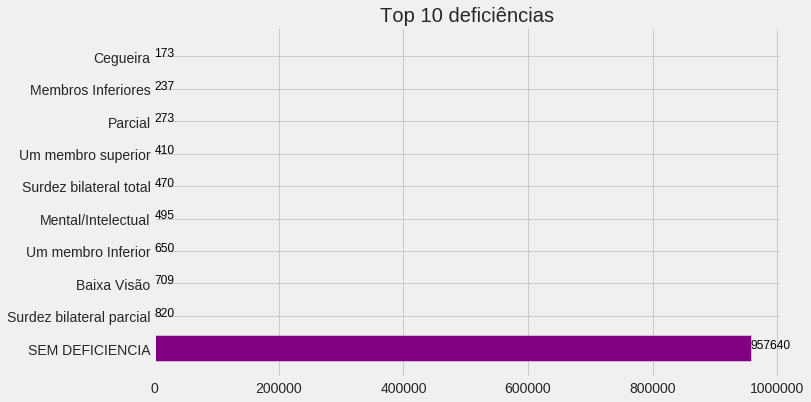

In [57]:
title_font = {'size':'23', 'color':'#696969'}
axis_font = {'size': '15', 'color': '#696969'}
ticks_font = {'size': '12', 'color': '#000000'}

values = data['DEFICIENCIAS'].value_counts().values[:10]
index = data['DEFICIENCIAS'].value_counts().index[:10]

plt.barh(y=index, width=values, color='purple')
plt.title('Top 10 deficiências')

for i, v in enumerate(values[:10]):
    plt.text(v + 50, i + .001, str(v), color='black', fontsize=12)

plt.show()

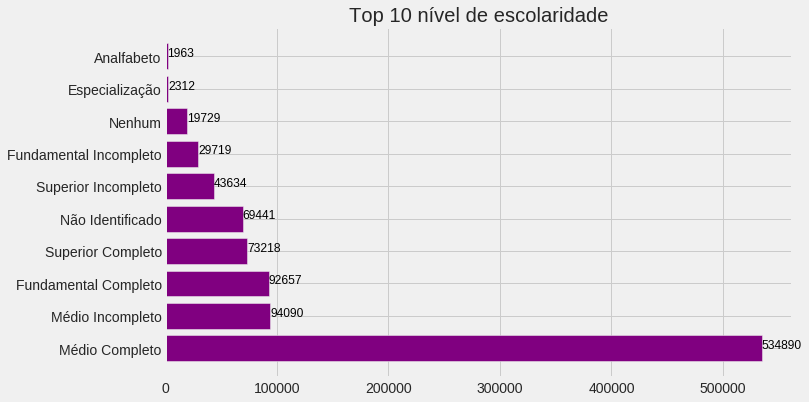

In [61]:
title_font = {'size':'23', 'color':'#696969'}
axis_font = {'size': '15', 'color': '#696969'}
ticks_font = {'size': '12', 'color': '#000000'}

values = data['ESCOLARIDADE'].value_counts().values[:10]
index = data['ESCOLARIDADE'].value_counts().index[:10]

plt.barh(y=index, width=values, color='purple')
plt.title('Top 10 nível de escolaridade')

for i, v in enumerate(values[:10]):
    plt.text(v + 50, i + .001, str(v), color='black', fontsize=12)

plt.show()

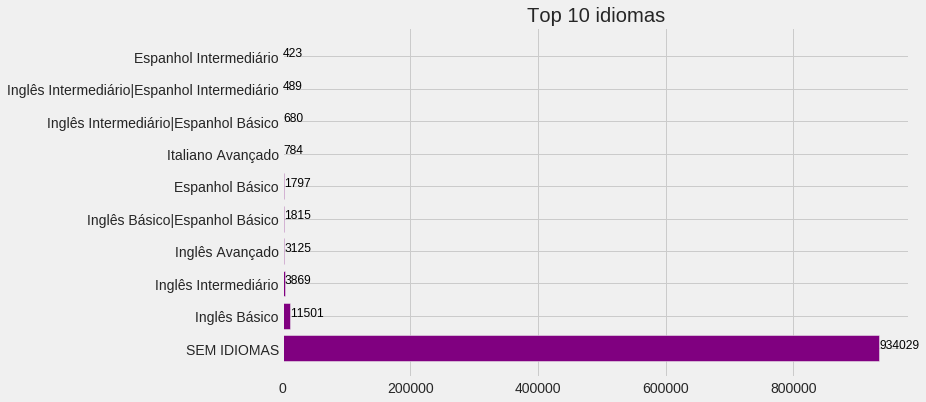

In [62]:
title_font = {'size':'23', 'color':'#696969'}
axis_font = {'size': '15', 'color': '#696969'}
ticks_font = {'size': '12', 'color': '#000000'}

values = data['IDIOMAS'].value_counts().values[:10]
index = data['IDIOMAS'].value_counts().index[:10]

plt.barh(y=index, width=values, color='purple')
plt.title('Top 10 idiomas')

for i, v in enumerate(values[:10]):
    plt.text(v + 50, i + .001, str(v), color='black', fontsize=12)

plt.show()

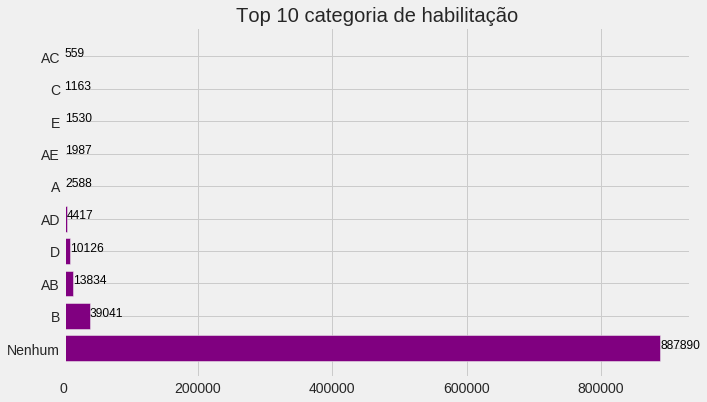

In [63]:
title_font = {'size':'23', 'color':'#696969'}
axis_font = {'size': '15', 'color': '#696969'}
ticks_font = {'size': '12', 'color': '#000000'}

values = data['HABILITACAO'].value_counts().values[:10]
index = data['HABILITACAO'].value_counts().index[:10]

plt.barh(y=index, width=values, color='purple')
plt.title('Top 10 categoria de habilitação')

for i, v in enumerate(values[:10]):
    plt.text(v + 50, i + .001, str(v), color='black', fontsize=12)

plt.show()